# Project

## Abstract
We took a look at how the extreme solutions of the free energy equation behave with respect to the temperature and check what happens when we couple the bands with one another. 
We checked that for the first coupling term, $\nu(|\psi_1|^2|\psi_2|^2)$, as when a field is aproximately constant, the coupling term becomes a first order field and it alters direcly the effective temperature, shifting the critical temperature of each band. 
As for the second term, $-\eta(\psi_1\psi_2^*+\psi_2\psi_1^*)$, we checked that depending on the coupling parammeter, $\eta$, the field with the lowest critical temperature, leaves it's usual behavior, when $\eta=0$, and starts approaching the other field's critical temperature.

## Introduction

The free energy, $F$, of a superconductor describes the superconducting transition and can be expressed in terms of a  complex   order parameter  field, $\psi(r) = |\psi(r)|e^{i\phi(r)}$, where the quantity $|\psi(r)|^2$ is a measure of the local density, like a quantum mechanics  wave function <ref name=":0" /> and $\psi(r)$ is nonzero below a phase transition into a superconducting state. The usual free energy equation is expressed as

$$ F = F_n + \alpha |\psi|^2 + \frac{\beta}{2} |\psi|^4 + \frac{1}{2m^*} \left| \left(-i\hbar\nabla - \frac{q^*}{c}\mathbf{A} \right) \psi \right|^2 + \frac{|\mathbf{B}|^2}{8\pi} $$


where $F_n$ is the free energy in the normal phase, $α$ and $β$ in the initial argument were treated as phenomenological parameters, $m$ is an  effective mass (solid-state physics)|effective mass, $e$ is the charge of an electron, $'A$' is the  magnetic vector potential , and $\mathbf{B}=\nabla \times \mathbf{A}$ is the magnetic field. By minimizing the free energy with respect to variations in the order parameter and the vector potential, one arrives at the Ginzburg–Landau equations, which can be useful to determine the field, $\psi$, in terms of the temperature, due to expressing, $\alpha=\alpha_0(T-T_c)$.
In this project, we are going to consider a third order field, to the field $\psi_2$ , and some new coupling terms, where the fields are uniform, and there are no eletric nor magnetic fields, and so the full free energy equation is
$$F=\alpha_1|\psi_1|^2+\alpha_2|\psi_2|^2+\frac{\beta}{2}(|\psi_1|^4+|\psi_2|^4)+ \frac{\gamma}{3}|\psi_2|^6+\nu(|\psi_1|^2|\psi_2|^2)-\eta(\psi_1\psi_2^*+\psi_2\psi_1^*).$$



## Constants

In [7]:
clear all

alpha_0 = 2;
beta = 1;
gama = 1;
n = 0.5;
Tc1 = 130;
Tc2 = 100;
Tf = 160;
dT = =0.1;

Error: Incorrect use of '=' operator. To assign a value to a variable, use '='. To compare values for equality, use '=='.



In [ ]:
alpha_1 = @ (T) alpha_0 * (T-Tc1);
alpha_2 = @ (T) alpha_0 * (T-Tc2);

## Free energy equation

### Free energy with a third order term

$$F=\alpha_1|\psi_1|^2+\alpha_2|\psi_2|^2+\frac{\beta}{2}(|\psi_1|^4+|\psi_2|^4)+ \frac{\gamma}{3}|\psi_2|^6$$

Let's minimize the equation by deriving with respect to $|\psi_{1,2}|$, we get,$$\frac{dF}{d|\psi_2|}=\psi(\alpha_2+\beta|\psi|^2+\gamma|\psi|^4)=0 \Leftrightarrow |\psi_2|=\pm\sqrt{\frac{-\beta\pm\sqrt{\beta^2-4\alpha_2\gamma}}{2\gamma}}$$
$$\frac{dF}{d|\psi_1|}=2\alpha_1\psi+2\beta|\psi|^2\psi=0\Leftrightarrow \psi(\alpha_1+\beta|\psi|^2)=0\Leftrightarrow|\psi|=\pm \sqrt{-\frac{\alpha_1}{\beta}}$$

We are only interested in the positive solutions, so we are going to ignore the negative ones, and ignore the complex solutions.

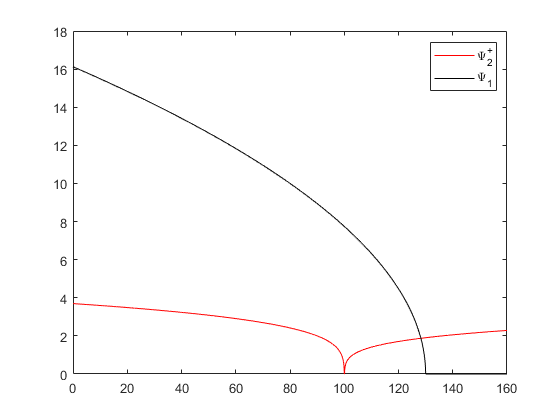

In [ ]:
psi2= @(T)sqrt((-beta+sqrt(beta^2-4*alpha_2(T)*gama))/(2*gama));

psi1=@(T) sqrt(-alpha_1(T)/beta);
T=0:dT:Tf;

psi2_nocoup=psi2(T);
psi1_nocoup=psi1(T);

plot(T,psi2_nocoup,'r')
hold on
plot(T,psi1_nocoup,'k')

legend('\Psi_2^+','\Psi_1')

### Free energy with a coupling and without a third order term

#### $F_{\psi_1\psi_2}=-\eta(\psi_1\psi_2^*+\psi_2\psi_1^*)$

$$F=\alpha_1|\psi_1|^2+\alpha_2|\psi_2|^2+\frac{\beta}{2}(|\psi_1|^4+|\psi_2|^4)-\eta(\psi_1\psi_2^*+\psi_2\psi_1^*)$$

It's painfully hard, to find the extreme solutions of the free energy equation analytically, and so we have to solve it using numerical methods. But even tho we can still simplify this a bit, checking it's derivative with $\phi_1$
$$\frac{\partial F}{\partial \phi}=2|\psi_1||\psi_2|sin(\phi_1-\phi_2)=0 \Leftrightarrow \phi_1=\phi_2$$
and so the coupling term gets reduced gets reduced to
$$F_{\psi_1\psi_2}=-2\eta|\psi_2||\psi_1|$$

In [ ]:
%%file solve_F.m

function [output] = solve_F(alpha_0,beta,gama,n,Tc1,Tc2,T,PsiMax,PsiMin)
    alpha_1 = @ (T) alpha_0 * (T-Tc1);
    alpha_2 = @ (T) alpha_0 * (T-Tc2);
    
    F_funct = @(psi1,psi2) alpha_1(T) * psi1^2 + alpha_2(T) * psi2^2 + beta*(psi1^4+psi2^4)/2 + gama*( psi2^6 ) / 3 - n * ( 2 * psi1 * psi2 );
    
    dPsi = 0.1;
    
    k = 0;
    mins = [];
    i = 0;
    Psi = PsiMin-4*dPsi:dPsi:PsiMax+4*dPsi;
    for psi_1 = Psi
        i=i+1;
        g=0;
        for psi_2 = Psi
            g=g+1;
            F(i,g) = F_funct(psi_1,psi_2);
            % FIND MINIMUM
            if i > 2 && g > 2
                if(F(i,g-1) > F(i-1,g-1) && F(i-2,g) > F(i-1,g-1) && F(i-1,g) > F(i-1,g-1) && F(i-1,g-2) > F(i-1,g-1))
                    k=k+1;
                    mins(k,:) = [Psi(i-1),Psi(g-1)];
                end                
            end
        end
    end
    
    if k == 0
        output = [0,0];
    else
        output = mins(k,:);
    end
end

Created file 'c:\Users\gusta\Desktop\DAF_proj\Projeto_daf\solve_F.m'.


In [ ]:
psi_1 = zeros(Tc1/dT-1,1);
psi_2 = zeros(Tc1/dT-1,1);

%Find Psi(T) values

PsiMax = 17; 
PsiMin = 0;

i = 0;
T = 0:dT:Tf;
for t = T
    i=i+1;

    out = solve_F(alpha_0,beta,0,n,Tc1,Tc2,t,PsiMax,PsiMin);
    psi_1(i) = out(1);
    psi_2(i) = out(2);
    PsiMax = max([psi_1(i),psi_2(i)]) * (1.3);
    PsiMin = min([psi_1(i),psi_2(i)]) * (0.30);
end

Vectors must be the same length.



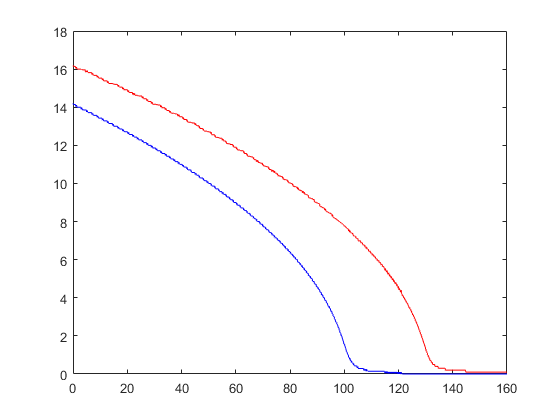

Error: Canceled future for execute_request message before replies were done

In [6]:
plot(T(1:length(psi_1)),psi_1,'r')
hold on
plot(T(1:length(psi_1)),psi_2,'b')
T=0:dT:Tf;
plot(T,psi1_nocoup,'r--')
plot(T,psi2_nocoup,'b--')

#### $F_{\psi_1\psi_2}=\nu(|\psi_1|^2|\psi_2|^2)$

$$F=\alpha_1|\psi_1|^2+\alpha_2|\psi_2|^2+\frac{\beta}{2}(|\psi_1|^4+|\psi_2|^4)+\nu(|\psi_1|^2|\psi_2|^2)$$

To find the extreme points we take the derivative of the free energy with respect to $|\psi_i|$,$$\frac{dF}{d|\psi_i|}=\alpha_i|\psi_i|+\beta|\psi_i|^3+\nu|\psi_j|^2|\psi_i|=0 \Leftrightarrow $$
$$\Leftrightarrow |\psi_i|(\alpha_i+\beta|\psi_i|^2+\nu|\psi_j|^2)=0\Leftrightarrow |\psi_i|=0 \vee \alpha_i+\beta|\psi_i|^2+\nu|\psi_j|^2=0 $$
$$\Leftrightarrow |\psi_i|=0 \vee |\psi_j|^2=-\frac{1}{\nu}(\alpha_i+\beta|\psi_i|^2)$$
with $j\neq i$.
$$\left\{\begin{array}{c} |\psi_1|^2=-\frac{1}{\beta}(\alpha_1+\nu|\psi_2|^2) \\ |\psi_2|^2=-\frac{1}{\beta}(\alpha_1+\nu|\psi_1|^2)\end{array}\right. \Leftrightarrow |\psi_1|^2=|\psi_2|^2=\frac{-\alpha_{1,2}}{\nu+\beta}$$

In [7]:
psi_1 = @(T) sqrt(-alpha_1(T)/(v+beta));
psi_2 = @(T) sqrt(-alpha_2(T)/(v+beta));

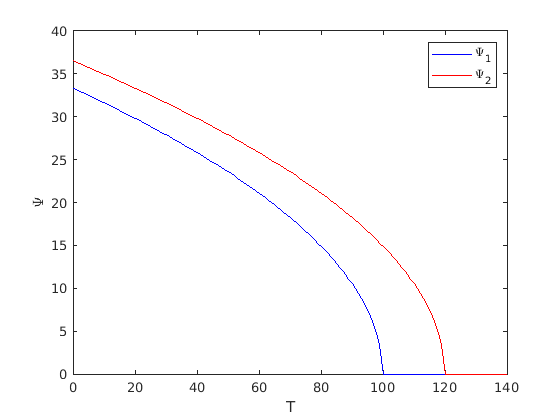

In [8]:
T = 0:dT:Tf;
plot(T,psi_1(T),'b')
hold on
plot(T,psi_2(T),'r')
xlabel('T')
ylabel('\Psi')
legend('\Psi_1','\Psi_2')

### Free energy with coupling

#### $F_{\psi_1\psi_2}=-2\eta|\psi_2||\psi_1|$

$$F=\alpha_1|\psi_1|^2+\alpha_2|\psi_2|^2+\frac{\beta}{2}(|\psi_1|^4+|\psi_2|^4)+ \frac{\gamma}{3}|\psi_2|^6-2\eta|\psi_2||\psi_1|$$

As mentioned before, and with the new third order term it's even more difficult to determine the extreme solutions, and so we are going to find them numerically.


ans = 

    "T: 1 - 141"


ans = 

    "Psi not found"


ans = 

    "Psi not found"


ans = 

    "T: 2 - 141"


ans = 

    "Psi not found"


ans = 

    "Psi not found"


ans = 

    "T: 3 - 141"


ans = 

    "Psi not found"


ans = 

    "Psi not found"


ans = 

    "T: 4 - 141"


ans = 

    "Psi not found"


ans = 

    "Psi not found"


ans = 

    "T: 5 - 141"


ans = 

    "Psi not found"


ans = 

    "Psi not found"


ans = 

    "T: 6 - 141"


ans = 

    "Psi not found"


ans = 

    "Psi not found"


ans = 

    "T: 7 - 141"


ans = 

    "Psi not found"


ans = 

    "Psi not found"


ans = 

    "T: 8 - 141"


ans = 

    "Psi not found"


ans = 

    "Psi not found"


ans = 

    "T: 9 - 141"


ans = 

    "Psi not found"


ans = 

    "Psi not found"


ans = 

    "T: 10 - 141"


ans = 

    "Psi not found"


ans = 

    "Psi not found"


ans = 

    "T: 11 - 141"


ans = 

    "Psi not found"


ans = 

    "Psi not found"


ans = 

    "T: 12 - 141"


ans = 

    

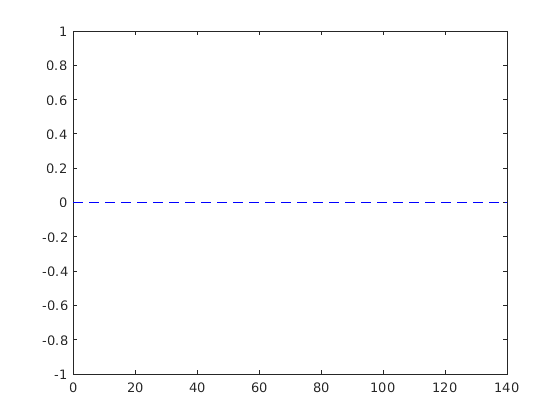

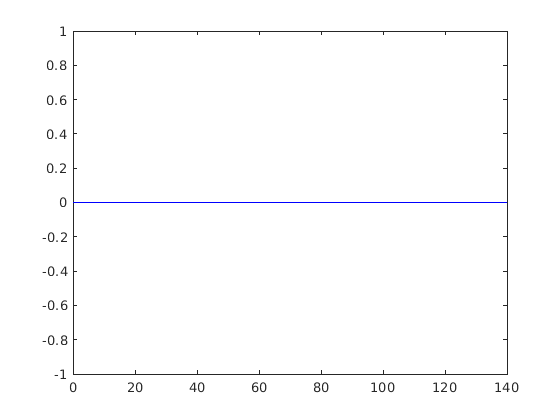

In [5]:
i = 0;
T = 0:dT:Tf;
PsiMax = 11;
PsiMin = 0;
for t = T
    i=i+1;
    "T: " + i + " - " + length(T)
    out = solve_F(alpha_0,beta,gama,v,Tc1,Tc2,t,PsiMax,PsiMin);
    psi_1_coup(i) = out(1);
    psi_2_coup(i) = out(2);
    PsiMax = max([psi_1_coup(i),psi_2_coup(i)]) * (1.05);
    PsiMin = min([psi_1_coup(i),psi_2_coup(i)]) * (0.95);
end
%%
figure(1)
plot(T(1:length(psi2_nocoup)),psi2_nocoup,'r--')
hold on
plot(T(1:length(psi1_nocoup)),psi1_nocoup,'b--')

figure(2)
plot(T(1:length(psi_1_coup)),psi_1_coup,'r')
hold on
plot(T(1:length(psi_2_coup)),psi_2_coup,'b')

#### $F_{\psi_1\psi_2}=\nu(|\psi_1|^2|\psi_2|^2)$

$$F=\alpha_1|\psi_1|^2+\alpha_2|\psi_2|^2+\frac{\beta}{2}(|\psi_1|^4+|\psi_2|^4)+ \frac{\gamma}{3}|\psi_2|^6+\nu(|\psi_1|^2|\psi_2|^2)$$

To find the extreme points we take the derivative of the free energy with respect to {$|\psi_1|,|\psi_2|$},
$$\frac{dF}{d|\psi_1|}=2\alpha|\psi_1|+2\beta|\psi_1|^3+2\nu|\psi_1||\psi_2|^2=0$$
$$\frac{dF}{d|\psi_2|}=2\alpha|\psi_2|+2\beta|\psi_2|^3+2\gamma|\psi_2|^5+2\nu|\psi_1|^2|\psi_2|=0$$

Solving $\psi_1$:

$$\alpha|\psi_1|+\beta|\psi_1|^3+\nu|\psi_1||\psi_2|^2=0 
\Leftrightarrow
|\psi_1|(\alpha+\beta|\psi_1|^2+\nu|\psi_2|^2)=0$$
$$|\psi_1|=0 \vee |\psi_2|^2 = -\frac{1}{\nu}(\alpha+\beta|\psi_1|^2)$$

Solving $\psi_2$:

$$\alpha|\psi_2|+\beta|\psi_2|^3+\nu|\psi_1|^2|\psi_2|+\gamma|\psi_2|^5=0 
\Leftrightarrow
|\psi_2|(\alpha+\beta|\psi_2|^2+\gamma|\psi_2|^4+\nu|\psi_1|^2)=0$$
$$|\psi_2|=0 \vee |\psi_2|^2 = \frac{-\beta\pm\sqrt{\beta^2-4\gamma(\alpha+\nu|\psi_1|^2)}}{2\gamma}$$

Therefore

$$-\frac{1}{\nu}(\alpha+\beta|\psi_1|^2)=\frac{-\beta\pm\sqrt{\beta^2-4\gamma(\alpha+\nu|\psi_1|^2)}}{2\gamma}$$
$$(2\frac{\gamma^2}{\nu^2}\alpha\beta-\frac{\gamma}{\nu}\beta^2+\gamma\nu)|\psi_1|^2 +
(\frac{\gamma^2}{\nu^2}\beta^2)|\psi_1|^4+(\gamma\alpha-\frac{\gamma}{\nu}\beta\alpha+\frac{\gamma^2}{\nu}\alpha^2) = 0$$

$|\psi_1|$ can be expressed as:

$$A = (\frac{\gamma}{\nu}\beta)^2$$
$$B = 2\frac{\gamma^2}{\nu^2}\alpha\beta - \frac{\gamma}{\nu}\beta^2 + \gamma\nu$$
$$C = \frac{\gamma^2}{\nu}\alpha^2+\gamma\alpha-\frac{\gamma}{\nu}\beta\alpha$$
$$|\psi_1|^2 = \frac{-B \pm \sqrt{B^2-4AC}}{2A}$$

In [ ]:
A = ((gama/v)*beta)^2;
B = @(T) 2*(gama/v)^2*alpha1(T)*beta - (gama/v)*beta^2 + gama*v;
C = @(T) (gama^2/v)*alpha1(T).^2 + gama*alpha2(T) - (gama/v)*beta*alpha1(T);

%%%Psi 1%%%%
Psi_1_plus_plus = @(T) sqrt((-B(T) + sqrt(B(T).^2-4*A.*C(T)))./(2*A));
Psi_1_minus_plus = @(T) -sqrt((-B(T) + sqrt(B(T).^2-4*A.*C(T)))./(2*A));
Psi_1_plus_minus = @(T) sqrt((-B(T) - sqrt(B(T).^2-4*A.*C(T)))./(2*A));
Psi_1_minus_minus = @(T) -sqrt((-B(T) - sqrt(B(T).^2-4*A.*C(T)))./(2*A));


%%%Psi 2%%%%
Psi_2_plus_pp = @(T) sqrt((-1/v) * (alpha1(T)+beta*Psi_1_plus_plus(T).^2));
Psi_2_plus_pm = @(T) sqrt((-1/v) * (alpha1(T)+beta*Psi_1_plus_minus(T).^2));
Psi_2_plus_mp = @(T) sqrt((-1/v) * (alpha1(T)+beta*Psi_1_minus_plus(T).^2));
Psi_2_plus_mm = @(T) sqrt((-1/v) * (alpha1(T)+beta*Psi_1_minus_minus(T).^2));
Psi_2_minus_pp = @(T) -sqrt((-1/v) * (alpha1(T)+beta*Psi_1_plus_plus(T).^2));
Psi_2_minus_pm = @(T) -sqrt((-1/v) * (alpha1(T)+beta*Psi_1_plus_minus(T).^2));
Psi_2_minus_mp = @(T) -sqrt((-1/v) * (alpha1(T)+beta*Psi_1_minus_plus(T).^2));
Psi_2_minus_mm = @(T) -sqrt((-1/v) * (alpha1(T)+beta*Psi_1_minus_minus(T).^2));

In [ ]:
figure(1) %psi1
sgtitle('\psi_1')
plot(Ts1,Psi_1_plus_plus(Ts1),'b')
hold on
plot(Ts1,Psi_1_plus_minus(Ts1),'r')
hold on
plot(Ts1,Psi_1_minus_plus(Ts1),'g')
hold on
plot(Ts1,Psi_1_minus_minus(Ts1),'y')
legend("+ +","+ -","- +","- -")
xlim([0 20])
ylim([-10 10])

In [ ]:
figure(2)
sgtitle('\psi_2')
plot(Ts2,Psi_2_plus_pp(Ts2),"-k")
hold on
plot(Ts2,Psi_2_plus_pm(Ts2),"c")
hold on
plot(Ts2,Psi_2_plus_mp(Ts2),"k")
hold on
plot(Ts2,Psi_2_plus_mm(Ts2),"m")
hold on
plot(Ts2,Psi_2_minus_pp(Ts2),"b")
hold on
plot(Ts2,Psi_2_minus_pm(Ts2),"g")
hold on
plot(Ts2,Psi_2_minus_mp(Ts2),"r")
hold on
plot(Ts2,Psi_2_minus_mm(Ts2),"y")
legend("+ + +","+ + -","+ - +","+ - -","- + +","- + -","- - +","- - -")
xlim([0 20])
ylim([-10 10])